# 吴恩达机器学习课后习题

# #ex1 实现单变量线性回归，多变量线性回归

## 1.  Linear regression with one variable 单变量线性回归

In [1]:
import numpy as np #导入numpy库并另名为np，用于矩阵运算
import pandas as pd #导入pandas库并另名为pd，用于高效数据分析
import matplotlib.pyplot as plt #导入matplotlib库并另名为plt，用于产品级2D图形绘制

data = pd.read_csv('ex1data1.txt',header = None, names=['Population', 'Profit'])#读取数据并赋予列名
#type(data)查看数据类型

In [2]:
data.head()#看前五行#

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.info()#查看数据的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
data.shape#查看数据的大小

(97, 2)

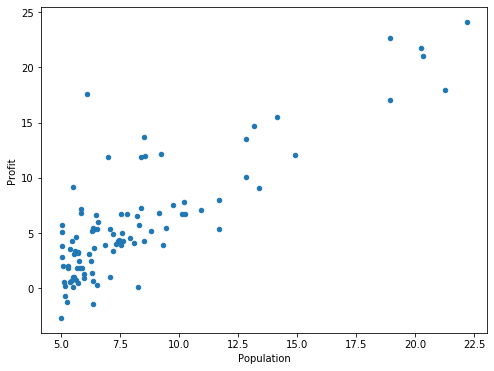

In [5]:
#画散点图
data.plot(kind='scatter',x='Population',y='Profit',figsize=(8,6))
plt.show()

In [6]:
#定义代价函数
def computeCost(X,y,theta):
    inner = np.power(((X * theta.T)-y),2)
    return np.sum(inner)/(2*X.shape[0])

In [7]:
#在训练集中添加一列，一边可使用向量化的解决方案来计算代价和梯度
data.insert(0,'Ones',1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [16]:
#设置x训练集和y值
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行去掉最后一列
y = data.iloc[:,cols-1:]#y是所有行，最后一列

In [23]:
#将X，y转化为矩阵（matrix），并初始化系数theta
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))

In [26]:
#看下维度
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [27]:
#计算代价函数(theat初始值为0)
computeCost(X,y,theta)

32.072733877455676

In [28]:
#bath gradient decent(批量梯度下降)
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta)
    return theta,cost

In [44]:
#初始化一些附加变量
alpha = 0.01#学习速率alpha
iters = 1000#迭代次数

In [45]:
#运行梯度下降算法来将参数theta合于训练集
g ,cost = gradientDescent(X,y,theta,alpha,iters)

In [46]:
g

matrix([[-3.24140214,  1.1272942 ]])

In [47]:
#拟合的参数计算训练模型的代价误差
computeCost(X,y,g)

4.515955503078912

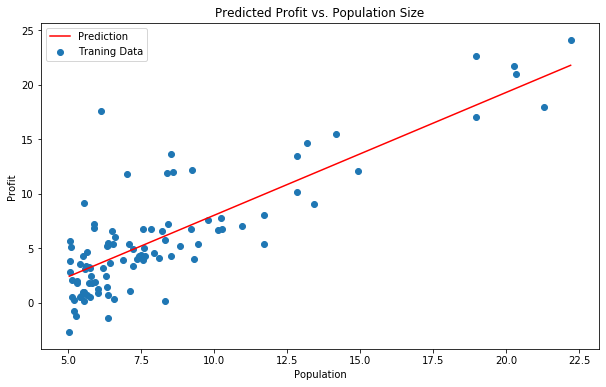

In [48]:
#绘制线性模型以及数据
x = np.linspace(data.Population.min(),data.Population.max(),100)

f = g[0,0] + (g[0,1]*x)
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

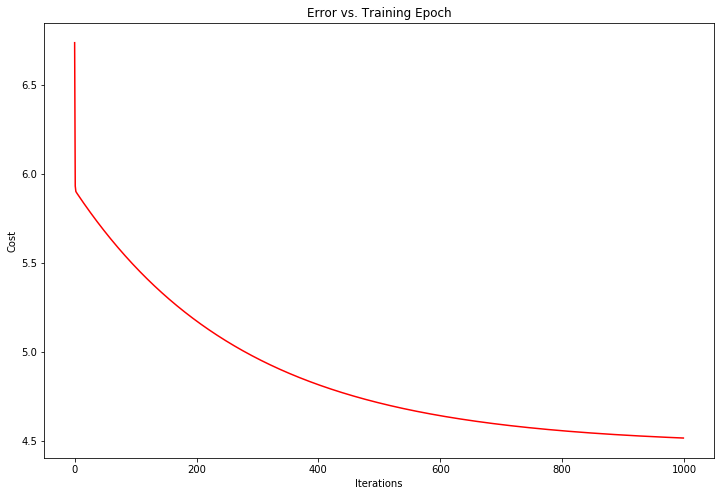

In [49]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 2. Linear regression with multiple variable 多变量线性回归


In [116]:
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
data2 = pd.read_csv('ex1data2.txt',header = None, names=['Size','Population', 'Profit'])#读取数据并赋予列名
data3 = pd.read_csv('ex1data2.txt',header = None, names=['Size','Population', 'Profit'])

In [117]:
data2.head()

,Size,Population,Profit
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [118]:
#特征归一化
#mean()是平均值，std()是标准差
data2 = (data2 - data2.mean()) /data2.std()

In [119]:
#在训练集中添加一列，一边可使用向量化的解决方案来计算代价和梯度
data2.insert(0,'Ones',1)
data2.head()

,Ones,Size,Population,Profit
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


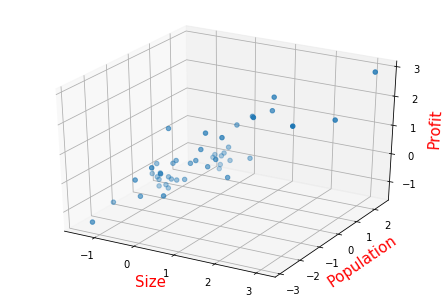

In [130]:
# 绘制散点图
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data2.iloc[:,1],data2.iloc[:,2],data2.iloc[:,3])
  
# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Profit', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Population', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('Size', fontdict={'size': 15, 'color': 'red'})
plt.show()

In [121]:
#设置x训练集和y值
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]#X是所有行去掉最后一列
y2= data2.iloc[:,cols-1:]#y是所有行，最后一列

In [122]:
#将X，y转化为矩阵（matrix），并初始化系数theta
X2 = np.matrix(X2)
y2 = np.matrix(y2)
theta2 = np.matrix(np.array([0,0,0]))

In [123]:
g2,cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

In [124]:
g2

matrix([[-1.03191687e-16,  8.78503652e-01, -4.69166570e-02]])

In [125]:
# 得到模型误差
computeCost(X2, y2, g2)

0.13070336960771892

ValueError: input operand has more dimensions than allowed by the axis remapping

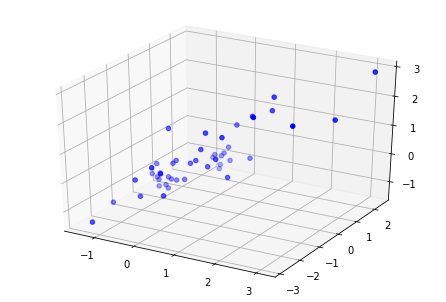

In [192]:
#绘制线性模型以及数据
fig = plt.figure()
ax = Axes3D(fig)

#x1 = np.linspace(data2.Size.min(),data2.Size.max(),100)
#x2 = np.linspace(data2.Population.min(),data2.Population.max(),100)

f= np.sum(np.multiply(np.matrix(data2.iloc[:,0:3]),g2),axis=1)

ax.scatter(data2.iloc[:,1],data2.iloc[:,2],data2.iloc[:,3],color = 'b',label='Traning Data')
ax.plot(np.array(data2.iloc[:,1]),np.array(data2.iloc[:,2]),f[:,0].reshape(47,1),color = 'r',label='Prediction')
#ax.plot(x1,x2,f,color = 'r',label='Prediction')  
ax.legend(loc=2)
# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Profit')
ax.set_ylabel('Population')
ax.set_xlabel('Size')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

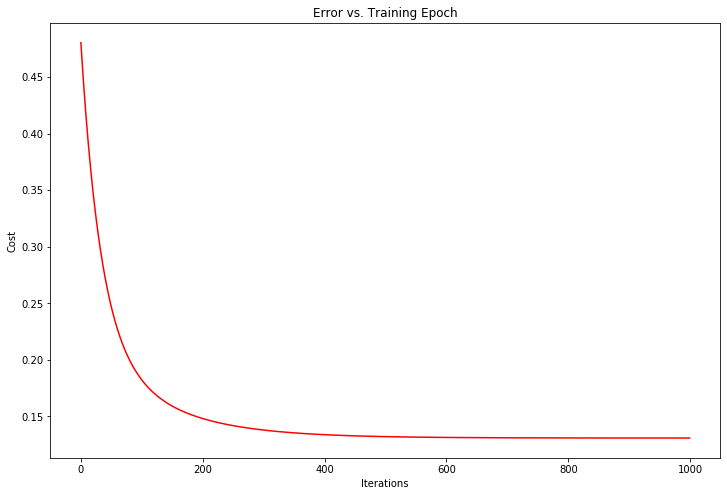

In [175]:
#查看训练过程
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [176]:
f = g2[0,0] + (g2[0,1]*0.13001) + (g2[0,2]*-0.223675)

In [135]:
f

0.12470834308850583

In [145]:
np.matrix(data2.iloc[:,0:3])

matrix([[ 1.00000000e+00,  1.30009869e-01, -2.23675187e-01],
        [ 1.00000000e+00, -5.04189838e-01, -2.23675187e-01],
        [ 1.00000000e+00,  5.02476364e-01, -2.23675187e-01],
        [ 1.00000000e+00, -7.35723065e-01, -1.53776691e+00],
        [ 1.00000000e+00,  1.25747602e+00,  1.09041654e+00],
        [ 1.00000000e+00, -1.97317285e-02,  1.09041654e+00],
        [ 1.00000000e+00, -5.87239800e-01, -2.23675187e-01],
        [ 1.00000000e+00, -7.21881404e-01, -2.23675187e-01],
        [ 1.00000000e+00, -7.81023044e-01, -2.23675187e-01],
        [ 1.00000000e+00, -6.37573110e-01, -2.23675187e-01],
        [ 1.00000000e+00, -7.63567023e-02,  1.09041654e+00],
        [ 1.00000000e+00, -8.56737193e-04, -2.23675187e-01],
        [ 1.00000000e+00, -1.39273340e-01, -2.23675187e-01],
        [ 1.00000000e+00,  3.11729182e+00,  2.40450826e+00],
        [ 1.00000000e+00, -9.21956312e-01, -2.23675187e-01],
        [ 1.00000000e+00,  3.76643089e-01,  1.09041654e+00],
        [ 1.00000000e+00

In [167]:
b =cnp.sum(np.multiply(np.matrix(data2.iloc[:,0:3]),np.matrix(g2)),axis=1)
b = np.array(b)

In [168]:
b

array([[ 0.12470824],
       [-0.43243852],
       [ 0.45192141],
       [-0.57418852],
       [ 1.05353857],
       [-0.06849309],
       [-0.50539822],
       [-0.62368136],
       [-0.6756375 ],
       [-0.54961621],
       [-0.11823834],
       [ 0.00974145],
       [-0.11185805],
       [ 2.62574076],
       [-0.7994479 ],
       [ 0.27972363],
       [-0.68031171],
       [-0.83482229],
       [ 0.62130766],
       [ 1.08780752],
       [-0.24782839],
       [-0.05241615],
       [-0.42801672],
       [-0.09391844],
       [ 2.09904179],
       [-0.98516348],
       [-0.58941241],
       [ 0.5912081 ],
       [ 0.23083143],
       [ 0.71391304],
       [-0.1065832 ],
       [-0.97240289],
       [-0.00769335],
       [ 1.266638  ],
       [-0.26084138],
       [-0.61262686],
       [-0.83150594],
       [ 0.09400804],
       [ 2.39666022],
       [ 0.12717154],
       [-0.30003694],
       [ 0.27283853],
       [ 0.57487876],
       [-0.87461849],
       [-1.19766227],
       [-0

In [187]:
b[:,0].reshape(47,1)

array([[ 0.12470824],
       [-0.43243852],
       [ 0.45192141],
       [-0.57418852],
       [ 1.05353857],
       [-0.06849309],
       [-0.50539822],
       [-0.62368136],
       [-0.6756375 ],
       [-0.54961621],
       [-0.11823834],
       [ 0.00974145],
       [-0.11185805],
       [ 2.62574076],
       [-0.7994479 ],
       [ 0.27972363],
       [-0.68031171],
       [-0.83482229],
       [ 0.62130766],
       [ 1.08780752],
       [-0.24782839],
       [-0.05241615],
       [-0.42801672],
       [-0.09391844],
       [ 2.09904179],
       [-0.98516348],
       [-0.58941241],
       [ 0.5912081 ],
       [ 0.23083143],
       [ 0.71391304],
       [-0.1065832 ],
       [-0.97240289],
       [-0.00769335],
       [ 1.266638  ],
       [-0.26084138],
       [-0.61262686],
       [-0.83150594],
       [ 0.09400804],
       [ 2.39666022],
       [ 0.12717154],
       [-0.30003694],
       [ 0.27283853],
       [ 0.57487876],
       [-0.87461849],
       [-1.19766227],
       [-0

In [189]:
data2.iloc[:,1]

0     0.130010
1    -0.504190
2     0.502476
3    -0.735723
4     1.257476
5    -0.019732
6    -0.587240
7    -0.721881
8    -0.781023
9    -0.637573
10   -0.076357
11   -0.000857
12   -0.139273
13    3.117292
14   -0.921956
15    0.376643
16   -0.856523
17   -0.962223
18    0.765468
19    1.296484
20   -0.294048
21   -0.141790
22   -0.499157
23   -0.048673
24    2.377392
25   -1.133356
26   -0.682873
27    0.661026
28    0.250810
29    0.800701
30   -0.203448
31   -1.259189
32    0.049477
33    1.429868
34   -0.238682
35   -0.709298
36   -0.958448
37    0.165243
38    2.786350
39    0.202993
40   -0.423657
41    0.298626
42    0.712618
43   -1.007523
44   -1.445423
45   -0.187090
46   -1.003748
Name: Size, dtype: float64